In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

import arrow

def parse_date(date_str, str_format='YYYY/MM/DD'):
    d = arrow.get(date_str, str_format)
    # 月初，月中，月末
    month_stage = int((d.day-1) / 10) + 1
    return (d.timestamp, d.year, d.month, d.day, d.week, d.isoweekday(), month_stage)

def show_cols(df):
    for c in df.columns:
        print(c)

# path = '/input/PPD/PPD-First-Round-Data-Update/Training Set'
# path = './PPD-First-Round-Data-Update/Training Set'
train_master = pd.read_csv('./PPD_Training_Master_GBK_3_1_Training_Set.csv', encoding='gbk')
train_loginfo = pd.read_csv ('./PPD_LogInfo_3_1_Training_Set.csv', encoding='gbk')
train_userinfo = pd.read_csv('./PPD_Userupdate_Info_3_1_Training_Set.csv', encoding='gbk')

# 数据清洗

In [28]:
null_sum_df

,num,ratio
WeblogInfo_3,29030,0.967667
WeblogInfo_1,29030,0.967667
UserInfo_11,18909,0.630300
UserInfo_13,18909,0.630300
UserInfo_12,18909,0.630300
WeblogInfo_20,8050,0.268333
WeblogInfo_21,3074,0.102467
WeblogInfo_19,2963,0.098767
WeblogInfo_2,1658,0.055267
WeblogInfo_4,1651,0.055033


In [29]:
null_sum = train_master.isnull().sum()
null_sum = null_sum[null_sum!=0]
null_sum_df = DataFrame(null_sum, columns=['num'])
null_sum_df['ratio'] = null_sum_df['num'] / 30000.0
null_sum_df.sort_values(by='ratio', ascending=False, inplace=True)

# 删除缺失严重的列
train_master.drop(['WeblogInfo_3', 'WeblogInfo_1', 'UserInfo_11', 'UserInfo_13', 'UserInfo_12', 'WeblogInfo_20'],
                  axis=1, inplace=True)

In [30]:
# 删除缺失严重的行
record_nan = train_master.isnull().sum(axis=1).sort_values(ascending=False)
drop_record_index = [i for i in record_nan.loc[(record_nan>=5)].index]
print('before train_master shape {}'.format(train_master.shape))
train_master.drop(drop_record_index, inplace=True)
print('after train_master shape {}'.format(train_master.shape))
# len(drop_record_index)

before train_master shape (30000, 222)
after train_master shape (29189, 222)


In [31]:

pd.value_counts(train_master['UserInfo_1'], ascending=False)

1.0    9724
3.0    5898
5.0    5665
4.0    4770
6.0    2351
7.0     676
2.0     103
0.0       1
Name: UserInfo_1, dtype: int64

In [32]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,1.0,1.0,1.0,1.0,14,...,222,-1,0,0,0,0,0,1,0,2014-3-5
1,10002,1.0,温州,4.0,温州,0.0,1.0,1.0,1.0,14,...,1,-1,0,0,0,0,0,2,0,2014-2-26
2,10003,1.0,宜昌,3.0,宜昌,0.0,2.0,2.0,2.0,9,...,-1,-1,-1,1,0,0,0,0,0,2014-2-28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,2,...,-1,-1,-1,0,0,0,0,0,0,2014-2-25
4,10007,5.0,辽阳,1.0,辽阳,0.0,1.0,1.0,1.0,3,...,-1,-1,-1,0,0,0,0,0,0,2014-2-27


In [33]:
# 填补缺失值
print('before all nan num: {}'.format(train_master.isnull().sum().sum()))

train_master.loc[train_master['UserInfo_2'].isnull(), 'UserInfo_2'] = '位置地点'
train_master.loc[train_master['UserInfo_4'].isnull(), 'UserInfo_4'] = '位置地点'

def fill_nan(f, method):
    if method == 'most':
        common_value = pd.value_counts(train_master[f], ascending=False).index[0]
    else:
        common_value = train_master[f].mean()
    train_master.loc[train_master[f].isnull(), f] = common_value

# 通过pd.value_counts(train_master[f])的观察得到经验
fill_nan('UserInfo_1', 'most')
fill_nan('UserInfo_3', 'most')
fill_nan('WeblogInfo_2', 'most')
fill_nan('WeblogInfo_4', 'mean')
fill_nan('WeblogInfo_5', 'mean')
fill_nan('WeblogInfo_6', 'mean')
fill_nan('WeblogInfo_19', 'most')
fill_nan('WeblogInfo_21', 'most')

print('after all nan num: {}'.format(train_master.isnull().sum().sum()))

before all nan num: 9808
after all nan num: 0


# Feature 分类

In [34]:
ratio_threshold = 0.5
binarized_features = []
binarized_features_most_freq_value = []

# 不同period的third_party_feature均值汇总在一起，结果并不好，故取消
# third_party_features = []
for f in train_master.columns:
    if f in ['target']:
        continue
        
#     if 'ThirdParty_Info_Period' in f:
#         third_party_features.append(f)
#         continue
    
    not_null_sum = (train_master[f].notnull()).sum()
    most_count = pd.value_counts(train_master[f], ascending=False).iloc[0]
    most_value = pd.value_counts(train_master[f], ascending=False).index[0]
    ratio = most_count / not_null_sum
    
    if ratio > ratio_threshold:
        binarized_features.append(f)
        binarized_features_most_freq_value.append(most_value)

numerical_features = [f for f in train_master.select_dtypes(exclude = ['object']).columns 
                      if f not in(['Idx', 'target']) 
                      and f not in binarized_features]
#                       and 'ThirdParty_Info_Period' not in f]
categorical_features = [f for f in train_master.select_dtypes(include = ["object"]).columns 
                        if f not in(['Idx', 'target']) 
                        and f not in binarized_features]
#                         and 'ThirdParty_Info_Period' not in f]

for i in range(len(binarized_features)):
    f = binarized_features[i]
    most_value = binarized_features_most_freq_value[i]
    train_master['b_' + f] = 1
    train_master.loc[train_master[f] == most_value, 'b_' + f] = 0
    train_master.drop([f], axis=1, inplace=True)

```
# 效果并不好
def mean_third_party(series):
    indexes = []
    data = []
    for i in range(1, 18):
        f = 'ThirdParty_Info_{}'.format(i)
        s = 0
        n = 0
        for period in range(1, 8):
            #ThirdParty_Info_Period1_1
            v = series['ThirdParty_Info_Period{}_{}'.format(period, i)]
            if v == -1:
                break
            s += v
            n += 1
        mean = 0 if n == 0 else s / n

        indexes.append(f)
        data.append(mean)

    # use the last loop, that's OK
    indexes.append('ThirdParty_num')
    data.append(n)
    return Series(data=data, index=indexes)
        
meaned_third_party = train_master[:100].apply(mean_third_party, axis=1)

train_master = train_master.merge(meaned_third_party, how='left', left_index=True, right_index=True)

# droped, result worse
# train_master.drop(third_party_features, axis=1, inplace=True)
del third_party_features

for i in range(1, 18):
    numerical_features.append('ThirdParty_Info_{}'.format(i))

categorical_features.append('ThirdParty_num')
```

In [35]:
feature_unique_count = []
for f in numerical_features:
    feature_unique_count.append((np.count_nonzero(train_master[f].unique()), f))
    
# print(sorted(feature_unique_count))

for c,f in feature_unique_count:
    if c <= 10:
        print('{} moved from numerical to categorical'.format(f))
        numerical_features.remove(f)
        categorical_features.append(f)

UserInfo_1 moved from numerical to categorical
UserInfo_3 moved from numerical to categorical
UserInfo_14 moved from numerical to categorical
UserInfo_15 moved from numerical to categorical


# Feature Engineering

## numerical

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


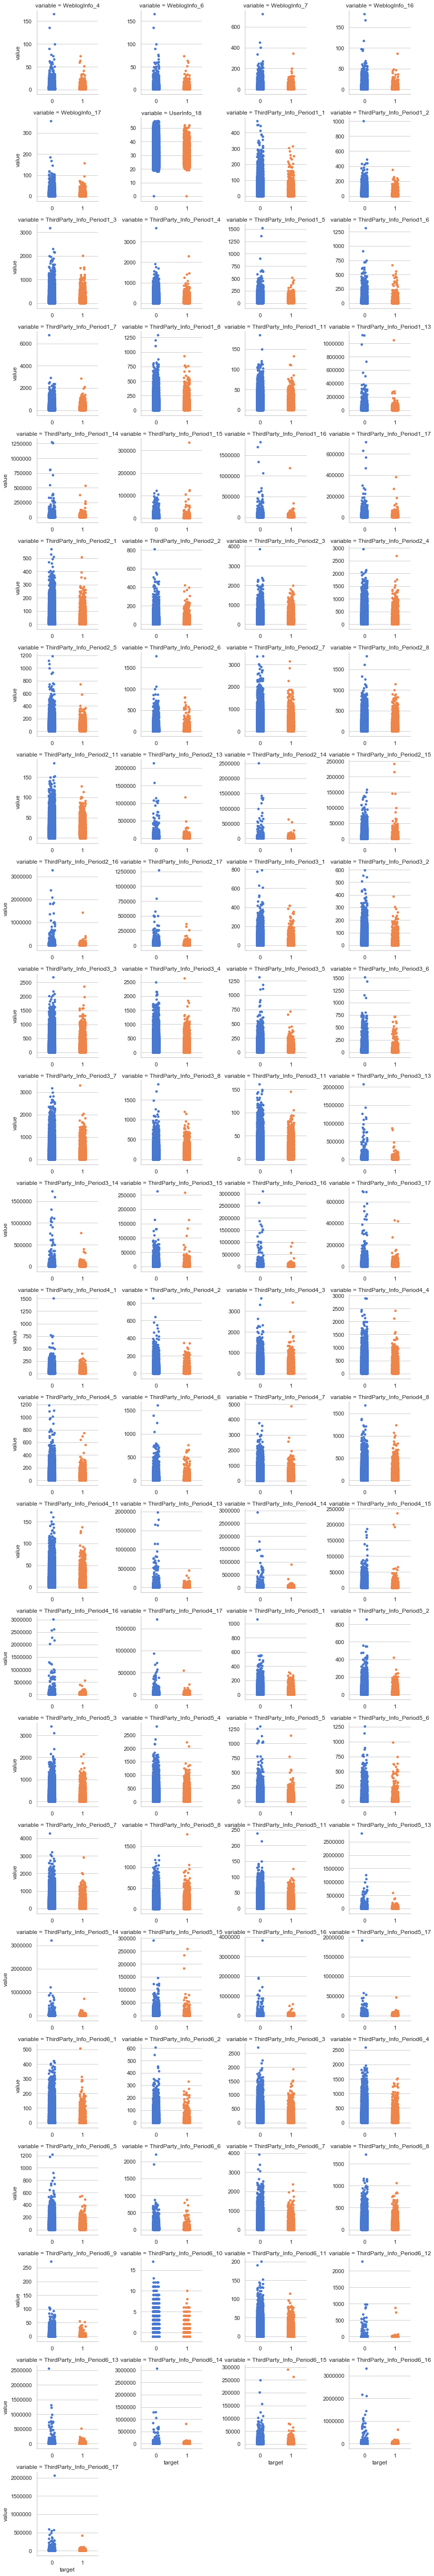

In [36]:
melt = pd.melt(train_master, id_vars=['target'], value_vars = [f for f in numerical_features])
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'target', 'value', jitter=True, palette="muted")

In [37]:
# hard work, but helps a lot

print('{} lines before drop'.format(train_master.shape[0]))

train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_1 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_2 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_2 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_3 > 2000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_3 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period6_4 > 1500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_5 > 400)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_7 > 2000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_6 > 1500)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_5 > 1000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_8 > 1500)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_8 > 1000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_16 > 2000000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_14 > 1000000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_12 > 60)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_11 > 120) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_11 > 20) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_13 > 200000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_13 > 150000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_15 > 40000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period6_17 > 130000) & (train_master.target == 0)].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period5_1 > 500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_2 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_3 > 3000) & (train_master.target == 0)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_3 > 2000)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_5 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_4 > 2000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_6 > 700].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_6 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_7 > 4000)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_8 > 800)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period5_11 > 200)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_13 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_14 > 150000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_15 > 75000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_16 > 180000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period5_17 > 150000].index, inplace=True)

# go above

train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_1 > 400)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_2 > 350)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_3 > 1500)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_4 > 1600].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_5 > 500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period4_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_8 > 1000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_13 > 250000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_14 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_15 > 70000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_16 > 210000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period4_17 > 160000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period3_1 > 400].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_2 > 380].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_3 > 1750].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_4 > 1750].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_4 > 1250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_5 > 600].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period3_7 > 1600) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_8 > 1000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_13 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_14 > 200000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_15 > 80000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_16 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period3_17 > 150000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period2_1 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_1 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_2 > 400].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_2 > 300) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_3 > 1800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_3 > 1500) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_4 > 1500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_5 > 580].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_6 > 800].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_6 > 400) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_7 > 2100].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_8 > 700) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_11 > 120].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_13 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_14 > 170000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_15 > 80000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period2_15 > 50000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_16 > 300000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period2_17 > 150000].index, inplace=True)


train_master.drop(train_master[train_master.ThirdParty_Info_Period1_1 > 350].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_1 > 200) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_2 > 300].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_2 > 190) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_3 > 1500].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_4 > 1250].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_5 > 400].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_6 > 500].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_6 > 250) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_7 > 1800].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_8 > 720].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_8 > 600) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_11 > 100].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_13 > 200000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_13 > 140000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_14 > 150000].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_15 > 70000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_15 > 30000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_16 > 200000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_16 > 100000) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.ThirdParty_Info_Period1_17 > 100000].index, inplace=True)
train_master.drop(train_master[(train_master.ThirdParty_Info_Period1_17 > 80000) & (train_master.target == 1)].index, inplace=True)

train_master.drop(train_master[train_master.WeblogInfo_4 > 40].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_6 > 40].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_7 > 150].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_16 > 50].index, inplace=True)
train_master.drop(train_master[(train_master.WeblogInfo_16 > 25) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.WeblogInfo_17 > 100].index, inplace=True)
train_master.drop(train_master[(train_master.WeblogInfo_17 > 80) & (train_master.target == 1)].index, inplace=True)
train_master.drop(train_master[train_master.UserInfo_18 < 10].index, inplace=True)

print('{} lines after drop'.format(train_master.shape[0]))

29189 lines before drop
28074 lines after drop


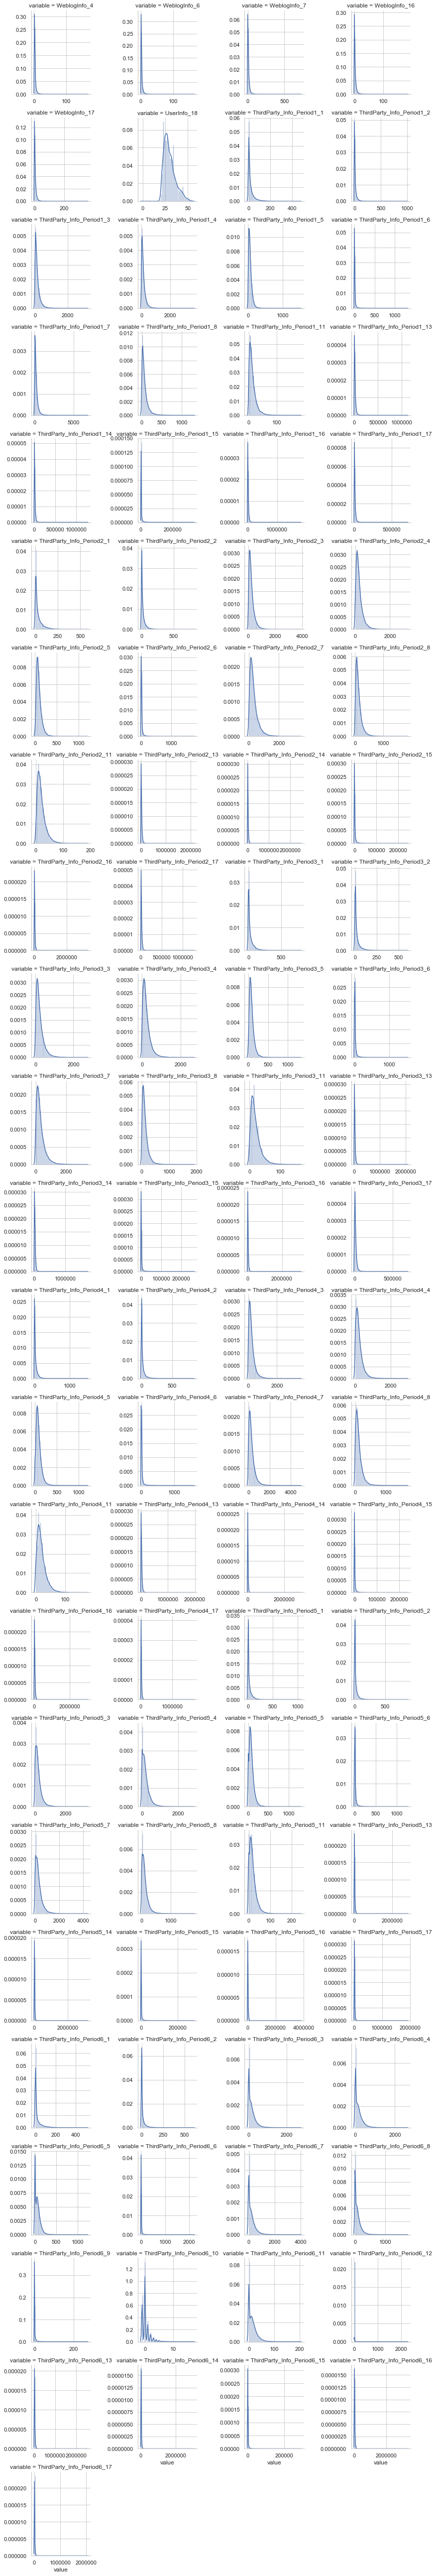

In [38]:
# melt = pd.melt(train_master, id_vars=['target'], value_vars = [f for f in numerical_features if f != 'Idx'])
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

In [39]:
# train_master_log = train_master.copy()
numerical_features_log = [f for f in numerical_features if f not in ['Idx']]

for f in numerical_features_log:
    train_master[f + '_log'] = np.log1p(train_master[f])
    train_master.drop([f], axis=1, inplace=True)


c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log1p
  """


In [40]:
from math import inf

(train_master == -inf).sum().sum()

206845

In [41]:
train_master.replace(-inf, -1, inplace=True)

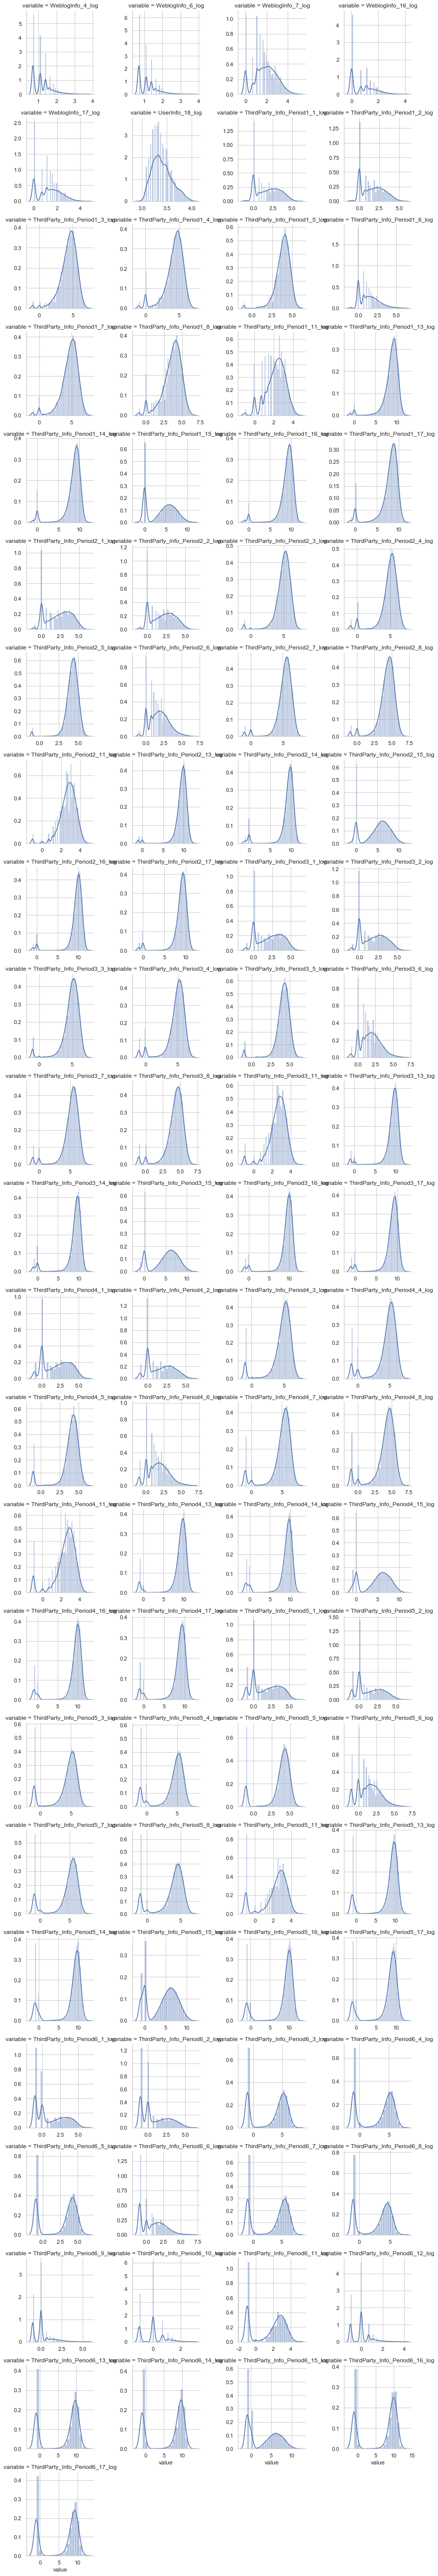

In [42]:
# log后的密度图，应该分布靠近正态分布了
melt = pd.melt(train_master, id_vars=['target'], value_vars = [f+'_log' for f in numerical_features])
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


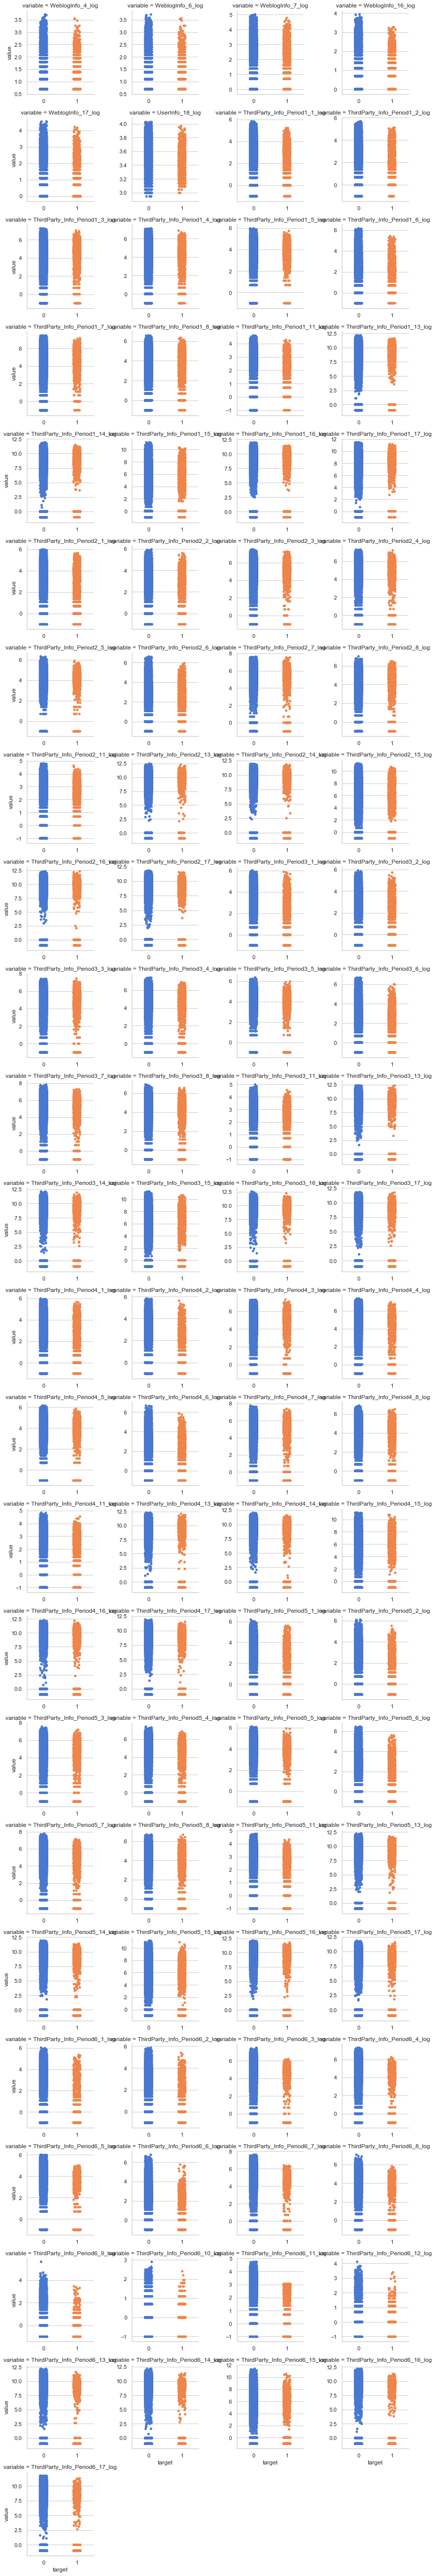

In [43]:
# log后的分布图，看是否有log后的outlier
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'target', 'value', jitter=True, palette="muted")

# categorical

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


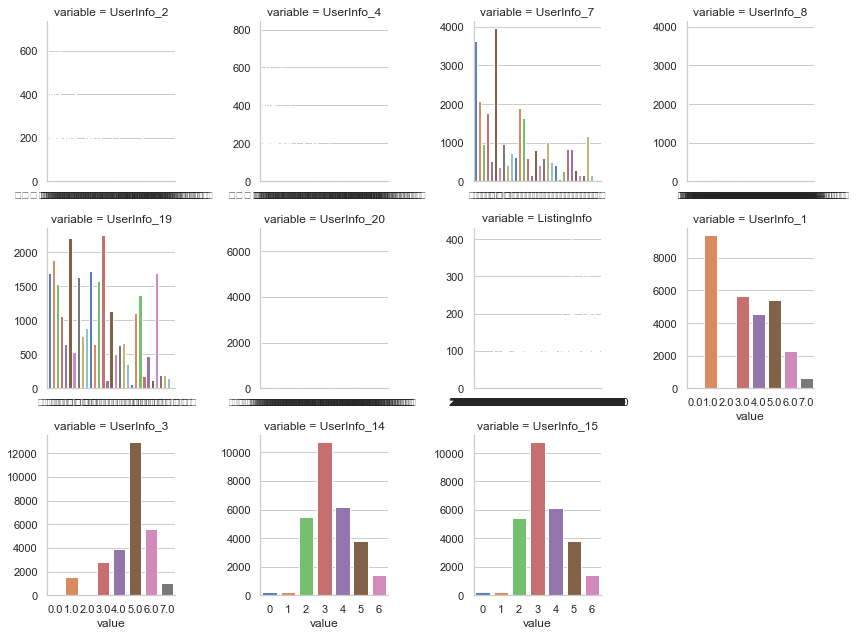

In [44]:
melt = pd.melt(train_master, id_vars=['target'], value_vars=[f for f in categorical_features])
g = sns.FacetGrid(melt, col='variable', col_wrap=4, sharex=False, sharey=False)
g.map(sns.countplot, 'value', palette="muted")

# 相关性查看

In [45]:
target_corr = np.abs(train_master.corr()['target']).sort_values(ascending=False)
target_corr

target                            1.000000
ThirdParty_Info_Period6_5_log     0.139606
ThirdParty_Info_Period6_11_log    0.139083
ThirdParty_Info_Period6_4_log     0.137962
ThirdParty_Info_Period6_7_log     0.135729
ThirdParty_Info_Period6_3_log     0.132310
ThirdParty_Info_Period6_14_log    0.131138
ThirdParty_Info_Period6_8_log     0.130577
ThirdParty_Info_Period6_16_log    0.128451
ThirdParty_Info_Period6_13_log    0.128013
ThirdParty_Info_Period5_5_log     0.126701
ThirdParty_Info_Period6_17_log    0.126456
ThirdParty_Info_Period5_4_log     0.121786
ThirdParty_Info_Period6_10_log    0.121729
ThirdParty_Info_Period6_1_log     0.121112
ThirdParty_Info_Period5_11_log    0.117162
ThirdParty_Info_Period5_7_log     0.114794
ThirdParty_Info_Period6_2_log     0.112041
ThirdParty_Info_Period6_9_log     0.112039
ThirdParty_Info_Period5_14_log    0.111374
ThirdParty_Info_Period5_3_log     0.108039
ThirdParty_Info_Period5_16_log    0.104786
ThirdParty_Info_Period6_12_log    0.104733
ThirdParty_

In [46]:
train_master['at_home'] = np.where(train_master['UserInfo_2']==train_master['UserInfo_8'], 1, 0)

In [47]:
train_master_ = train_master.copy()

In [48]:
def parse_ListingInfo(date):
    d = parse_date(date, 'YYYY/M/D')
    return Series(d, 
                  index=['ListingInfo_timestamp', 'ListingInfo_year', 'ListingInfo_month',
                           'ListingInfo_day', 'ListingInfo_week', 'ListingInfo_isoweekday', 'ListingInfo_month_stage'], 
                  dtype=np.int32)

ListingInfo_parsed = train_master_['ListingInfo'].apply(parse_ListingInfo)
print('before train_master_ shape {}'.format(train_master_.shape))
train_master_ = train_master_.merge(ListingInfo_parsed, how='left', left_index=True, right_index=True)
print('after train_master_ shape {}'.format(train_master_.shape))

ParserError: Failed to match '(?P<YYYY>\d{4})/(?P<M>\d{1,2})/(?P<D>\d{1,2})' when parsing '2014-3-5'

# train_loginfo

In [ ]:
def loginfo_aggr(group):
    loginfo_num = group.shape[0]
    loginfo_LogInfo1_unique_num = group['LogInfo1'].unique().shape[0]
    loginfo_active_day_num = group['LogInfo3'].unique().shape[0]
    min_day = parse_date(np.min(group['LogInfo3']), str_format='YYYY-MM-DD')
    max_day = parse_date(np.max(group['LogInfo3']), str_format='YYYY-MM-DD')
    gap_day = round((max_day[0] - min_day[0]) / 86400)

    indexes = {
        'loginfo_num': loginfo_num, 
        'loginfo_LogInfo1_unique_num': loginfo_LogInfo1_unique_num, 
        'loginfo_active_day_num': loginfo_active_day_num, 
        'loginfo_gap_day': gap_day, 
        'loginfo_last_day_timestamp': max_day[0]
    }
    
    # TODO every individual LogInfo1,LogInfo2 count

    def sub_aggr_loginfo(sub_group):
        return sub_group.shape[0]

    sub_group = group.groupby(by=['LogInfo1', 'LogInfo2']).apply(sub_aggr_loginfo)
    indexes['loginfo_LogInfo12_unique_num'] = sub_group.shape[0]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])
    
train_loginfo_grouped = train_loginfo.groupby(by=['Idx']).apply(loginfo_aggr)
train_loginfo_grouped.head()

In [ ]:
train_loginfo_grouped.to_csv('train_loginfo_grouped.csv', header=True, index=True)

In [ ]:
train_loginfo_grouped = pd.read_csv('train_loginfo_grouped.csv')
train_loginfo_grouped.head()

## train_userinfo

In [ ]:
def userinfo_aggr(group):
    op_columns = ['_EducationId', '_HasBuyCar', '_LastUpdateDate',
       '_MarriageStatusId', '_MobilePhone', '_QQ', '_ResidenceAddress',
       '_ResidencePhone', '_ResidenceTypeId', '_ResidenceYears', '_age',
       '_educationId', '_gender', '_hasBuyCar', '_idNumber',
       '_lastUpdateDate', '_marriageStatusId', '_mobilePhone', '_qQ',
       '_realName', '_regStepId', '_residenceAddress', '_residencePhone',
       '_residenceTypeId', '_residenceYears', '_IsCash', '_CompanyPhone',
       '_IdNumber', '_Phone', '_RealName', '_CompanyName', '_Age',
       '_Gender', '_OtherWebShopType', '_turnover', '_WebShopTypeId',
       '_RelationshipId', '_CompanyAddress', '_Department',
       '_flag_UCtoBcp', '_flag_UCtoPVR', '_WorkYears', '_ByUserId',
       '_DormitoryPhone', '_IncomeFrom', '_CompanyTypeId',
       '_CompanySizeId', '_companyTypeId', '_department',
       '_companyAddress', '_workYears', '_contactId', '_creationDate',
       '_flag_UCtoBCP', '_orderId', '_phone', '_relationshipId', '_userId',
       '_companyName', '_companyPhone', '_isCash', '_BussinessAddress',
       '_webShopUrl', '_WebShopUrl', '_SchoolName', '_HasBusinessLicense',
       '_dormitoryPhone', '_incomeFrom', '_schoolName', '_NickName',
       '_CreationDate', '_CityId', '_DistrictId', '_ProvinceId',
       '_GraduateDate', '_GraduateSchool', '_IdAddress', '_companySizeId',
       '_HasPPDaiAccount', '_PhoneType', '_PPDaiAccount', '_SecondEmail',
       '_SecondMobile', '_nickName', '_HasSbOrGjj', '_Position']

    userinfo_num = group.shape[0]
    userinfo_unique_num = group['UserupdateInfo1'].unique().shape[0]
    userinfo_active_day_num = group['UserupdateInfo2'].unique().shape[0]
    min_day = parse_date(np.min(group['UserupdateInfo2']))
    max_day = parse_date(np.max(group['UserupdateInfo2']))
    gap_day = round((max_day[0] - min_day[0]) / (86400))

    indexes = {
        'userinfo_num': userinfo_num, 
        'userinfo_unique_num': userinfo_unique_num, 
        'userinfo_active_day_num': userinfo_active_day_num, 
        'userinfo_gap_day': gap_day, 
        'userinfo_last_day_timestamp': max_day[0]
    }
    
    for c in op_columns:
        indexes['userinfo' + c + '_num'] = 0

    def sub_aggr(sub_group):
        return sub_group.shape[0]

    sub_group = group.groupby(by=['UserupdateInfo1']).apply(sub_aggr)
    for c in sub_group.index:
        indexes['userinfo' + c + '_num'] = sub_group.loc[c]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])
    
train_userinfo_grouped = train_userinfo.groupby(by=['Idx']).apply(userinfo_aggr)
train_userinfo_grouped.head()

In [ ]:
train_userinfo_grouped.to_csv('train_userinfo_grouped.csv', header=True, index=True)

In [ ]:
train_userinfo_grouped = pd.read_csv('train_userinfo_grouped.csv')
train_userinfo_grouped.head()

In [ ]:
print('before merge, train_master shape:{}'.format(train_master_.shape))

# train_master_ = train_master_.merge(train_loginfo_grouped, how='left', left_on='Idx', right_index=True)
# train_master_ = train_master_.merge(train_userinfo_grouped, how='left', left_on='Idx', right_index=True)

train_master_ = train_master_.merge(train_loginfo_grouped, how='left', left_on='Idx', right_on='Idx')
train_master_ = train_master_.merge(train_userinfo_grouped, how='left', left_on='Idx', right_on='Idx')

train_master_.fillna(0, inplace=True)

print('after merge, train_master shape:{}'.format(train_master_.shape))

In [ ]:
drop_columns = ['Idx', 'ListingInfo', 'UserInfo_20',  'UserInfo_19', 'UserInfo_8', 'UserInfo_7', 
                'UserInfo_4','UserInfo_2',
               'ListingInfo_timestamp', 'loginfo_last_day_timestamp', 'userinfo_last_day_timestamp']
train_master_ = train_master_.drop(drop_columns, axis=1)

dummy_columns = categorical_features.copy()
dummy_columns.extend(['ListingInfo_year', 'ListingInfo_month', 'ListingInfo_day', 'ListingInfo_week', 
                      'ListingInfo_isoweekday', 'ListingInfo_month_stage'])
finally_dummy_columns = []

for c in dummy_columns:
    if c not in drop_columns:
        finally_dummy_columns.append(c)

print('before get_dummies train_master_ shape {}'.format(train_master_.shape))
train_master_ = pd.get_dummies(train_master_, columns=finally_dummy_columns)
print('after get_dummies train_master_ shape {}'.format(train_master_.shape))

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = train_master_.drop(['target'], axis=1)
X_train = StandardScaler().fit_transform(X_train)
y_train = train_master_['target']
print(X_train.shape, y_train.shape)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# from scikitplot import plotters as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC

cv = StratifiedKFold(n_splits=3, shuffle=True)

def estimate(estimator, name='estimator'):
    auc = cross_val_score(estimator, X_train, y_train, scoring='roc_auc', cv=cv).mean()
    accuracy = cross_val_score(estimator, X_train, y_train, scoring='accuracy', cv=cv).mean()
    recall = cross_val_score(estimator, X_train, y_train, scoring='recall', cv=cv).mean()

    print("{}: auc:{:f}, recall:{:f}, accuracy:{:f}".format(name, auc, recall, accuracy))

#     skplt.plot_learning_curve(estimator, X_train, y_train)
#     plt.show()

#     estimator.fit(X_train, y_train)
#     y_probas = estimator.predict_proba(X_train)
#     skplt.plot_roc_curve(y_true=y_train, y_probas=y_probas)
#     plt.show()

In [ ]:
estimate(XGBClassifier(learning_rate=0.1, n_estimators=20, objective='binary:logistic'), 'XGBClassifier')
estimate(RidgeClassifier(), 'RidgeClassifier')
estimate(LogisticRegression(), 'LogisticRegression')
# estimate(RandomForestClassifier(), 'RandomForestClassifier')
estimate(AdaBoostClassifier(), 'AdaBoostClassifier')
# estimate(SVC(), 'SVC')# too long to wait
# estimate(LinearSVC(), 'LinearSVC')

# XGBClassifier: auc:0.747668, recall:0.000000, accuracy:0.944575
# RidgeClassifier: auc:0.754218, recall:0.000000, accuracy:0.944433
# LogisticRegression: auc:0.758454, recall:0.015424, accuracy:0.942010
# AdaBoostClassifier: auc:0.784086, recall:0.013495, accuracy:0.943791

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = []
# estimators.append(('RidgeClassifier', RidgeClassifier()))
estimators.append(('LogisticRegression', LogisticRegression()))
estimators.append(('XGBClassifier', XGBClassifier(learning_rate=0.1, n_estimators=20, objective='binary:logistic')))
estimators.append(('AdaBoostClassifier', AdaBoostClassifier()))
# estimators.append(('RandomForestClassifier', RandomForestClassifier()))

#voting: auc:0.794587, recall:0.000642, accuracy:0.944433

voting = VotingClassifier(estimators = estimators, voting='soft')
estimate(voting, 'voting')